# Stimulated Brillouin Scattering

In [1]:
%matplotlib inline
from ipywidgets import interact
# from IPython.html.widgets import *
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

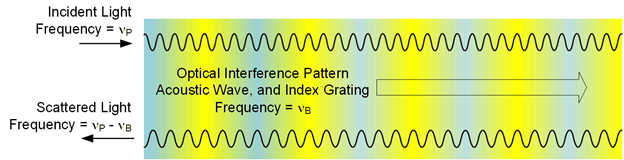

In [2]:
from IPython.core.display import Image 
Image(url='http://i.imgur.com/N1l2joU.png',embed=True,width=600)

Stimulated Brillouin Scattering (SBS) is a nonlinear optical effect that limits the amount of forward-traveling optical power than can be used for an optical communication link.

## The Basic Idea

The mechanism for SBS is as follows: Light of frequency $\nu _P$ (p for “pump”) is incident on a material medium. The light is scattered backwards off an index grating created by a random, thermally-generated phonon (acoustic wave) of frequency $\nu_B$ in the medium. This is called Spontaneous Brillouin scattering. The forward-going pump wave and backward-going scattered wave interfere to create an intensity pattern in the material. Through the process of electrostriction (deformation induced by an electric field), the optical intensity pattern creates a density pattern that propagates in the forward direction as an acoustic wave that also has a frequency $\nu_B$. This acoustic wave creates a corresponding index grating through the density dependence of the refractive index that enhances the original grating; so that, once initiated, the process reinforces itself. The reinforcing process is called Stimulated Brillouin Scattering.

## Stimulated Brillouin Scattering and Phonons

The frequency of the Doppler-shifted, scattered light is
$${\nu _S} = {\nu _P} - {\nu _B} ~~~~~~~ {(1)}$$
where $\nu_B$ is the frequency of the phonon (acoustic wave particle) that is absorbed in the scattering process. Not all phonons will have exactly the same frequency. Lifetime broadening of the phonon frequency spectrum means that phonon frequencies will be in the approximate range 
$$\begin{gathered}
  {\nu _B} = {\nu _{B0}} \pm \frac{{\Delta {\nu _B}}}{2} \\ 
  {\text{with }}{\nu _{B0}} = \frac{{{v_{sound}}}}{{{\lambda _{sound}}}} \approx \frac{{2n{v_{sound}}}}{{{\lambda _0}}}{\text{ and }}\Delta {\nu _B} = \frac{1}{{\pi {\tau _{ph}}}} \\ 
\end{gathered} ~~~~~~~ {(2)} $$
where v$_{sound}$ is the velocity of sound in the fiber and $\tau_{ph}$ is the phonon lifetime. The approximate expression ${\nu _{B0}} \approx \frac{{2n{v_{sound}}}}{{{\lambda _0}}}$ is true for the case of backward scattered light considered here, where n is the refractive index of the medium for the light waves, $\lambda_0$ is the optical vacuum wavelength, and both n and $\lambda_0$ are approximately the same for the pump and scattered light.


## Comparison with Stimulated Raman Scattering

$1.$ Calculate the Doppler shift, in Hertz, due to a phonon in the center of the frequency range, for light with $\lambda_0$ = 1540 nm in silica optical fiber with n = 1.48 and v$_{sound}$ = 5900 m/s.

In [3]:
n=1.48
vsound=5900
lambda0=1540*10**-9
print ('nuB0 = ', "%.2e" %(2*n*vsound/lambda0), 'Hz')

nuB0 =  1.13e+10 Hz


This shift is very much smaller than the frequency shift generated by Stimulated Raman Scattering, which is on the order of several THz.

The low frequency phonons that are involved in Stimulated Brillouin Scattering are called “acoustic” phonons because they are the particles with acoustic (sound) waves. The high frequency phonons involved in Raman Scattering are of different type called “optical” phonons because they have the frequency of infrared light.

$2.$ Estimate the phonon frequency spread in optical fiber, in Hertz, given a phonon lifetime of  22 nanoseconds.

In [4]:
tauphoton = 22*10**-9
print ('delta_nu_B = ' "%.2e" %(1/(np.pi*tauphoton)), 'Hz')

delta_nu_B = 1.45e+07 Hz


This calculation shows another important way in which Raman Scattering and Brillouin Scattering differ. The range of vibrational frequencies involved in SBS is several orders of magnitude smaller than the range for SRS.

This means that SBS, unlike SRS, cannot be used to simultaneous amplify multiple wavelengths signals in a multi-wavelength optical communication link.

## Coupled Equations and Gain for SBS

For SBS, the rate at which energy is transferred from a pump to scattered light is proportional to the product of the irradiances. This leads to the set of coupled differential equations
$$\frac{{d{I_s}\left( z \right)}}{{dz}} =  - {g_B}\left( {\Delta {\nu _p} - \Delta {\nu _s}} \right){I_P}\left( z \right){I_s}\left( z \right) + \alpha {I_s}\left( z \right)\qquad(3)$$
$$\frac{{d{I_p}\left( z \right)}}{{dz}} =  - {g_B}\left( {\Delta {\nu _p} - \Delta {\nu _s}} \right){I_s}\left( z \right){I_P}\left( z \right) - \alpha {I_p}\left( z \right)\qquad(4)~,$$

where $g_B$ is a coupling constant that has a peak value $g_{B0}$ for $\Delta {\nu _p} - \Delta {\nu _s} = {\nu _{B0}}$ (see equations 1 and 2), $\alpha$ is the absorption coefficient for the optical fiber, and both $g_B$ and  $g_{B0}$ are determined by the material properties of the optical fiber. The + and – signs on the right side of equations 3 and 4 arise from the fact that the pump light travels in the forward direction and the scattered light in the backwards direction.

We can relate the irradiance of a light beam to its power by defining an “effective” fiber core area that takes into account the spread of the optical mode into the cladding:
$$I\left( z \right) \equiv {{P\left( z \right)} \over {{A_{eff}}}}~{.}$$
Using the definition for $A_{eff}$ in equations 3 and 4 gives
$${{d{P_s}\left( z \right)} \over {dz}} =  - {g_B}{{{P_P}\left( z \right)} \over {{A_{eff}}}}{P_s}\left( z \right) + \alpha {P_s}\left( z \right)\qquad(5)$$
$${{d{P_p}\left( z \right)} \over {dz}} =  - {g_B}{P_s}\left( z \right){{{P_P}\left( z \right)} \over {{A_{eff}}}} - \alpha {P_p}\left( z \right)\qquad(6)~.$$
Coupled equations like these frequently appear in an analysis of the interaction of light beams. Finding solutions to this set of equations is complicated by the product of $P_P$ and $P_s$ that appears on the right hand side of equations 5 and 6.  We can make things simpler by neglecting the depletion of the pump light due to power transfer to the backward scattered light. This is equivalent to neglecting the first term in the equation 6. In this case, the pump power at a position z along the optical fiber is
$${{d{P_p}\left( z \right)} \over {dz}} =  - \alpha {P_p}\left( z \right) \Rightarrow {P_p}\left( z \right) = {P_p}\left( 0 \right){e^{ - \alpha z}} \qquad (7).$$
Using equation 7 with equation 5 gives
$${{d{P_s}\left( z \right)} \over {dz}} =  - {g_B}{{{P_P}\left( 0 \right){e^{ - \alpha z}}} \over {{A_{eff}}}}{P_s}\left( z \right) + \alpha {P_s}\left( z \right),$$
which can be rearranged to give
$${1 \over {{P_s}}}d{P_s} = \left( { - {g_B}{{{P_P}\left( 0 \right){e^{ - \alpha z}}} \over {{A_{eff}}}} + \alpha } \right)dz. \qquad (8)$$

$3.$ Integrate equation 8, integrating the left hand side from $P_s$ = $P_s(z)$ to $P_s$ = $P_s(0)$, and integrating the right hand side from z = L to z = 0. Then show that your result can be written
$${P_S}\left( 0 \right) = {P_S}\left( L \right)\exp \left( {{g_B} {{{P_P\left( 0 \right)}} \over {{A_{eff}}}}{L_{eff}} - \alpha L} \right)~,\qquad (9)$$
when you define an “effective” fiber length
$${\rm{L}}{}_{{\rm{eff}}}{\rm{ = }}{{1 - \exp \left( { - \alpha L} \right)} \over \alpha }.$$

Setting up the integrals gives
$$\int_{{P_s}\left( L \right)}^{{P_s}\left( 0 \right)} {{1 \over {{P_s}}}} \,d{P_s} = \int_L^0 {\left( { - {g_B}{{{P_P}\left( 0 \right){e^{ - \alpha z}}} \over {{A_{eff}}}} + \alpha } \right)} \,dz\;.$$
Then integrating both sides gives
$$\eqalign{
  & \left. {\ln \left( {{P_S}} \right)} \right|_{{P_s}\left( L \right)}^{{P_s}\left( 0 \right)} = \left. {\left( {{g_B}{{{P_P}\left( 0 \right){e^{ - \alpha z}}} \over {\alpha {A_{eff}}}} + \alpha z} \right)\;} \right|_L^0  \cr 
  &  \Rightarrow \ln \left( {{P_S}\left( 0 \right)} \right) - \ln \left( {{P_S}\left( L \right)} \right) = {g_B}\left( {{{{P_P}\left( 0 \right)} \over {\alpha {A_{eff}}}} - {{{P_P}\left( 0 \right){e^{ - \alpha L}}} \over {\alpha {A_{eff}}}}} \right) - \alpha L  \cr 
  &  \Rightarrow \ln \left( {{{{P_S}\left( 0 \right)} \over {{P_S}\left( L \right)}}} \right) = {g_B}\left( {{{{P_P}\left( 0 \right)} \over {{A_{eff}}}}L{}_{eff}} \right) - \alpha L  \cr 
  &  \Rightarrow {{{P_S}\left( 0 \right)} \over {{P_S}\left( L \right)}} = \exp \left( {{g_B}\left( {{{{P_P}\left( 0 \right)} \over {{A_{eff}}}}L{}_{eff}} \right) - \alpha L} \right)  \cr 
  &  \Rightarrow {P_S}\left( 0 \right) = {P_S}\left( L \right)\exp \left( {{g_B} {{{{P_P}\left( 0 \right)} \over {{A_{eff}}}}L{}_{eff}}  - \alpha L} \right)\;. \cr} $$

Equation 9 is a generalization of Beer’s law for the absorption of light in a passive medium, ${\rm{P}}\left( L \right){\rm{ = P}}\left( 0 \right)\exp \left( { - \alpha L} \right)$, that includes optical gain. 

The SBS gain coefficient depends on the power of the pump wave, and the gain coefficient is multiplied by Leff  - the effective length of fiber over which the pump generates scattered light. ${L_{eff}} \approx L$ when the absorption coefficient $\alpha$ is small, and ${L_{eff}} \approx 1/\alpha $ when a significant fraction of the light is absorbed before the pump reaches z = L.

The SBS threshold power is defined to be the value of the optical pump power at the input for which all the pump is reflected.  This would certainly be a problem for a fiber optic transmission link where the pump is the signal carrying the data. An expression for the SBS threshold power can be derived from equation 8. The derivation, which is too involved to cover here, gives
$${P_{th}} = 21{{{A_{eff}}1.5} \over {{g_{B0}}{L_{eff}}}}\left( {1 + {{\Delta {\nu _P}} \over {\Delta {\nu _B}}}} \right)~,$$
where the factor of 1.5 means that we have assumed the pump and scattered light are linearly polarized, but the direction of the polarizations vary separately and randomly along the length of the fiber (typically the case for optical communication systems). The factor $1 + {{\Delta {\nu _P}} \over {\Delta {\nu _B}}}$ takes into account the reduction of Brillouin scattering when the spectral width of the pump light is comparable to or larger than the range of phonon frequencies.

The most original and most cited reference for this derivation is “Optical Power Handling Capacity of Low Loss Optical Fibers.” R. G. Smith, Applied Optics, Vol. 11, No. 11 pp. 2489-2494 (1972). The derivation involves summing the amplified contributions from spontaneous Brillouin scattering along a length of the fiber.

${4.}$ Calculate the SBS threshold power for a narrow band source ($\Delta\nu_P$ << $\Delta\nu_B$) and a 100-kilometer-long optical fiber with $\alpha$ = 4.6 x $10^{-5}$ $m^{-1}$ (equivalent to a loss of 0.2 dB/km), an effective core area $A_{eff}$ = 50 $\mu m^2$, and an SBS gain coefficient $g_{B0}$ = 4.2 x $10^{-11}$ m/W.

We can neglct ther term $\Delta\nu_P$/$\Delta\nu_B$ in the expression for the threshold power because $\Delta\nu_P$ << $\Delta\nu_B$. First we calculate $L_{eff}$.

In [5]:
L=120*10**3
alpha=5.07*10**-5
Leff=(1-np.exp(-alpha*L))/alpha
print ('Leff =', "%.2e" %(Leff), 'meter')

Leff = 1.97e+04 meter


Notice that $L_{eff}$ is quite a bit shorter than the actual length of the fiber, L.

Now we are ready to calulate $P_{th}$.

In [6]:
Aeff=50*(10**-6)**2
gB0=4.2*10**-11
Pth=21*Aeff*1.5/(gB0*Leff)
print ('Pth =', "%.2e" %(Pth), 'watt')

Pth = 1.91e-03 watt


The SBS threshold is very low – about 1000 times smaller than for Raman Scattering.
Note, however, that modulation of the incident optical pump beam to transmit data at B bits per second increases its frequency content by (at least) B Hz and would be expected to increase the SBS threshold by a factor of 1 + B/$\Delta\nu_B$. A data rate of 10 GHz leads to an increase in the threshold of about 60x.

## An SBS Amplifier

Stimulated Brillouin Scattering can be used to make a narrow band optical amplifier. Equation 9 shows how an input signal at z = L is amplified as it travels to z = 0.

$5.$ Find the length of fiber that is required to give an overall SBS gain of 150 if $g_B$ = $g_{B0}$ 
= 4.2 x $10^{-11}$ m/W, the effective area of the optical mode is 50 $\mu m^2$, and the pump power is 10 mW. You will need to solve for L graphically or numerically.


For this problem you are using equation 9 and taking
$${P_S}\left( 0 \right) = 150 \times {P_S}\left( L \right)~.$$
If the "0" and the "L" seem to be on the wrong sides of the equation, remember that SBS is backward scattered light and grows backwards along the fiber.
What we do now is plot
$G=\exp \left( {{g_B}{{{P_P}\left( 0 \right)} \over {{A_{eff}}}}{L_{eff}} - \alpha L} \right)$ vs. L and then find the value of L for which the quantity equals 150.

<function __main__.GainPlot>

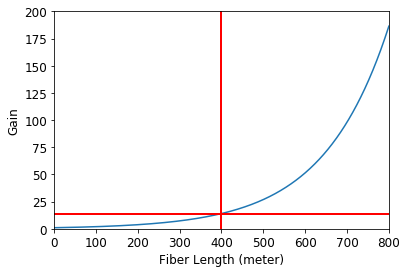

In [7]:
L=np.linspace(0,800,1000)
Pp0=0.008
G=np.exp(gB0*(Pp0/Aeff)*((1-np.exp(-alpha*L))/alpha)-alpha*L)
def GainPlot(Fiber_Length):   
    plt.rc('font',size=12)
    plt.xlabel('Fiber Length (meter)')
    plt.xlim(0,800)
    plt.ylabel('Gain')
    plt.ylim(0,200)
    plt.plot(L,G)
    plt.plot([Fiber_Length, Fiber_Length], [0, 200], linestyle='-', color='r', lw=2)
    plt.plot([0,800],[np.exp(gB0*(Pp0/Aeff)*((1-np.exp(-alpha*Fiber_Length))/alpha)-alpha*Fiber_Length)\
            ,np.exp(gB0*(Pp0/Aeff)*((1-np.exp(-alpha*Fiber_Length))/alpha)-alpha*Fiber_Length)],'r', lw=2)
interact (GainPlot,Fiber_Length=(0,800,1.0))

From the graph we find that the gain G is 150 when the length of fiber is about 600 meter. To get a more accurate value we can find the root of
$$G-150=\exp \left( {{g_B}{{{P_P}\left( 0 \right)} \over {{A_{eff}}}}{L_{eff}} - \alpha L} \right)-150~.$$


In [8]:
def Gain_Minus_100(Lf):
    return np.exp(gB0*(Pp0/Aeff)*((1-np.exp(-alpha*Lf))/alpha)-alpha*Lf)-150
print ('L(G=150) =', "%.1f" %optimize.brentq(Gain_Minus_100, 700, 800), 'meter')

L(G=150) = 766.1 meter


SBS amplification requires a relatively small pump power if the gain medium is relatively long.